In [1]:
%reload_kedro

# Load the unannotated data.
clips = catalog.load("tfrecord_unannotated")

2022-05-22 17:22:25,421 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /home/daniel/git/mot
2022-05-22 17:22:25,770 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-05-22 17:22:25,885 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-05-22 17:22:25,886 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-05-22 17:22:25,887 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-05-22 17:22:25,888 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-05-22 17:22:25,929 - kedro.extras.extensions.ipython - IN

In [2]:
from tqdm import tqdm

# Extract the actual datasets.
datasets = []
for loader in tqdm(clips.values()):
    datasets.append(loader())

  0%|                                                                                                                                                                                                                                                                                                                                                                                                                                                        | 0/5780 [00:00<?, ?it/s]2022-05-22 17:22:36.448892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-22 17:22:36.448909: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-22 17:22:36.448920: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (twilight-sparkle): /proc/driver/nvidia/v

In [3]:
from cotton_flower_mot.pipelines.dataset_io import rot_net_inputs_and_targets_from_datasets
from cotton_flower_mot.pipelines.config import ModelConfig

# Create the preprocessing pipeline.
config = ModelConfig(image_input_shape=(100, 100, 3), frame_input_shape=(1080, 1920, 3), detection_model_input_shape=(540, 960, 3),
                     rot_net_input_shape=(720, 720, 3), num_appearance_features=128, num_gcn_channels=128, sinkhorn_lambda=10.0, num_reduction_stages=2,
                     detection_sigma=3, nominal_detection_size=(0.052, 0.093))
preprocessed = rot_net_inputs_and_targets_from_datasets(datasets, config=config)

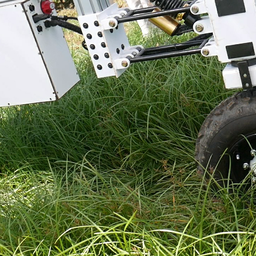

tf.Tensor(0, shape=(), dtype=int32)


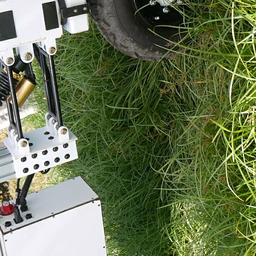

tf.Tensor(1, shape=(), dtype=int32)


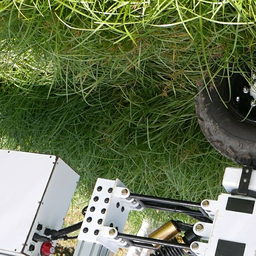

tf.Tensor(2, shape=(), dtype=int32)


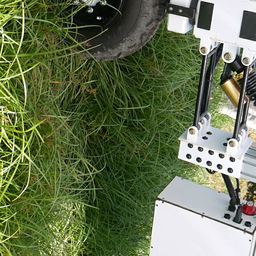

tf.Tensor(3, shape=(), dtype=int32)


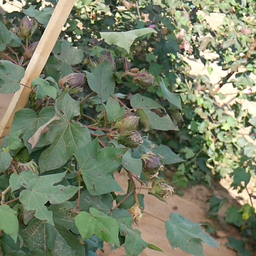

tf.Tensor(0, shape=(), dtype=int32)


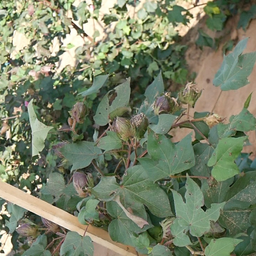

tf.Tensor(1, shape=(), dtype=int32)


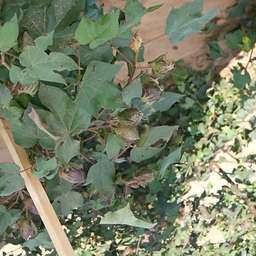

tf.Tensor(2, shape=(), dtype=int32)


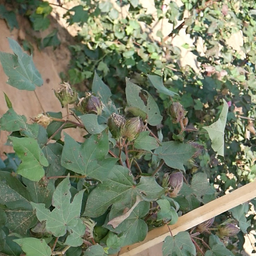

tf.Tensor(3, shape=(), dtype=int32)


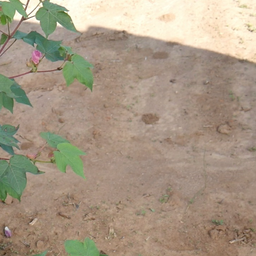

tf.Tensor(0, shape=(), dtype=int32)


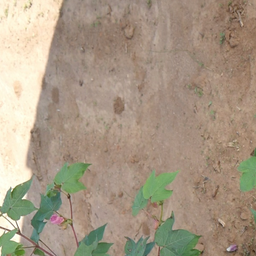

tf.Tensor(1, shape=(), dtype=int32)


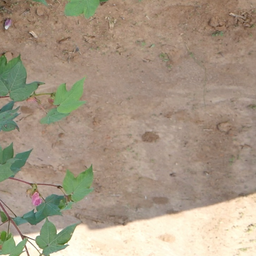

tf.Tensor(2, shape=(), dtype=int32)


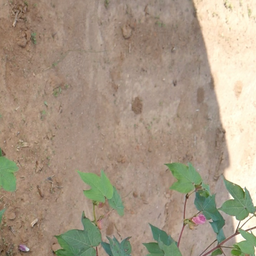

tf.Tensor(3, shape=(), dtype=int32)


In [13]:
import itertools
from PIL import Image
from IPython.display import display

# Sample the data.
for inputs, targets in itertools.islice(preprocessed.unbatch(), 12):
    # Convert BGR to RGB,
    image = Image.fromarray(inputs["image"].numpy()[..., ::-1])
    display(image.resize((256, 256), Image.Resampling.LANCZOS))
    
    print(targets["predictions"])